# MOBILE DETECTION

#### Have you ever wondered how we can detect mobiles or any object using deep learning with the help of transfer learning. If yes, then you are about to find out how and implement the solution by yourselves. It is primarily a Object detection.<br><br>


![Mobile Detection](https://drive.google.com/uc?id=1fN6qMQwPKmP54nR-68PYYMFIYH40Aqlj)


<br><br>Post your doubt/feedback/discussion in our FB group unit [here](https://www.facebook.com/groups/colearninglounge/) in the appropriate section.

## Table of content:

*   Introduction
*   Problem Statement
*   Installing Darkflow
*   Preparing Dataset and its dependencies
*   Importing necessary packages
*   Using Transfer learning to detect mobiles
*   Defining Model Options & Build the Model
*   Train the model
*   Prediction Time
*   Load from checkpoint/saved model
*   Draw Bounding boxes
*   Displaying predictions


## Introduction

In this tutorial, we'll find out how to detect custom objects like mobiles, helmet etc using YOLO with the help of darkflow. We will first cover some basics of Object detection like preparing data, modifying pre trained network and the predicting the mobiles.Then we will introduce how to train and evaluate a model. We will also cover some intermediate level  topics like saving a model and reusing a saved model.

## Problem Statement

We need to detect mobiles in the image or video using deep learning with the help of transfer learning.


## Installing Darkflow

We need to install darkflow from github inorder to run our custom object detector. First we clone the darkflow official github repo and then we will install darkflow.

In [0]:
!git clone -l -s https://github.com/thtrieu/darkflow.git
%cd darkflow
!python setup.py build_ext --inplace


Cloning into 'darkflow'...
remote: Enumerating objects: 2706, done.
remote: Total 2706 (delta 0), reused 0 (delta 0), pack-reused 2706
Receiving objects: 100% (2706/2706), 32.98 MiB | 4.99 MiB/s, done.
Resolving deltas: 100% (1760/1760), done.
/content/darkflow
cfg	  demo.gif  labels.txt	preview.png  sample_img  test
darkflow  flow	    LICENSE	README.md    setup.py


## Preparing Dataset and its dependencies

We need to prepare our own dataset using [labelImg](https://github.com/tzutalin/labelImg). First we need to download images from google or any source. For my demonstration I have taken images from google and using [fatkun](https://chrome.google.com/webstore/detail/fatkun-batch-download-ima/nnjjahlikiabnchcpehcpkdeckfgnohf?hl=en) I am able to download all the google images at once to a folder. Next step is to install labelImg and then load the downloaded images floder and start labelling manually. LabelImg will create ".xml" files corresponding to every image. So, make two floders "images" and "annotations" and save all images to "images" folder and all "xml" files to "annotations" folder. Please download my dataset and my dependencies from this [LINK](https://drive.google.com/open?id=1t0-gyJJVgg_fiWIIhUsJWKsEftYcFyRs) For my demonstration purpose I have mounted my drive so that I can extract the "mobile_detection_yolov2.tgz" file. In your case you can also do the same, download the dataset, upload to drive , mount the drive to colab and then extract the dataset and its dependencies.

### Mounting Google drive to colab
Go to link, allow access and provide authorization code and press enter

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Extract the dataset and is dependencies

Extract the tar ball using the below command.

In [0]:
!tar -zxvf /content/drive/My\ Drive/Colab\ Notebooks/object_detection/mobile_detection_yolov2.tgz

mobile_detection_yolov2/
mobile_detection_yolov2/cfg/
mobile_detection_yolov2/cfg/yolo_custom.cfg
mobile_detection_yolov2/cfg/._yolo_custom.cfg
mobile_detection_yolov2/cfg/yolo.cfg
mobile_detection_yolov2/load_chkpt.py
mobile_detection_yolov2/ckpt/
mobile_detection_yolov2/.git/
mobile_detection_yolov2/.git/description
mobile_detection_yolov2/.git/logs/
mobile_detection_yolov2/.git/logs/refs/
mobile_detection_yolov2/.git/logs/refs/heads/
mobile_detection_yolov2/.git/logs/refs/heads/master
mobile_detection_yolov2/.git/logs/refs/remotes/
mobile_detection_yolov2/.git/logs/refs/remotes/origin/
mobile_detection_yolov2/.git/logs/refs/remotes/origin/HEAD
mobile_detection_yolov2/.git/logs/HEAD
mobile_detection_yolov2/.git/refs/
mobile_detection_yolov2/.git/refs/heads/
mobile_detection_yolov2/.git/refs/heads/master
mobile_detection_yolov2/.git/refs/tags/
mobile_detection_yolov2/.git/refs/remotes/
mobile_detection_yolov2/.git/refs/remotes/origin/
mobile_detection_yolov2/.git/refs/remotes/origin/H

### Displaying the dataset contents

So the extracted folder is present in darkflow folder. As you can see there are two folders "images" and "annotations" which contains images and its corresponding xml files.If you can observe there is an ckpt folder which is an empty folder created to save the checkpoints during training the model.

In [0]:
%cd /content/darkflow/mobile_detection_yolov2
!ls

/content/darkflow/mobile_detection_yolov2
annotations  images		  photo.jpg	      sample_result.PNG
bin	     labels.txt		  predictions.jpeg    YOLOv2-Train.ipynb
cfg	     load_chkpt.py	  README.md
ckpt	     mobile_detection.py  sample_result2.PNG


## Importing necessary packages
As in every python/any language we need to import the necessary libraries.The below modules are necessary for our demo

In [0]:
from darkflow.net.build import TFNet
import cv2
import numpy as np

## Making Your Own Configuration File (cfg)
You need to make a slight change on the configuration file (*.cfg) to adjust existing model to fit into your own dataset. For example, YOLOv2's CNN model is trained on ImageNet dataset which contains a number of different object classes. However, I only want one (mobile phone) object class to detect.

You should do the following to make that change according to Darflow's official explanation.

1. Copy one of the pre-trained configuration file that you are going to use.

* In my case, I used yolo.cfg.

2. Rename the copied configuration file to your custom name

* In my case, I changed the name yolo.cfg to yolo_custom.cfg.
Open the configuration file and change classes in the [region] layer (the last layer) to the number of classes you are going to train for.

* In my case, classes are set to 1.

3. change filters in the [convolutional] layer (the second to last layer) to num * (classes + 5).

* In my case, num is 5 and classes are 1 so 5 * (1 + 5) = 30 therefore filters are set to 30. Here num means number of bounding boxes per grid.

4. Specifying Classes of Your Interest
* You also need to changes 'labels.txt' file included in the root directory. Just specify names of objects. In my case, I removed all text and left 'mobile' instead.



## Downloading Pre-trained Weights
Please go [here](https://pjreddie.com/darknet/yolo/) and download a pre-trained weights that you are interested. In my case, I downloaded yolov2.weights. After downloading is done, locate the file into 'bin' directory in the root directory.

In my case I downloaded the yolov2 weights using below.

![Mobile Detection](https://drive.google.com/uc?id=1JhCKSl8jx0COzbB5Wol1wovbJ1qv6Mib)

## Using Transfer learning to detect mobiles

mobile_detection_yolov2 folder has all dependencies like dataset(images and annotations), weights file in "bin/yolo.weights", and configuration file "cfg/yolo_custom.cfg" to detect only one object and last "labels.txt" which contains the labels or class names which are mentioned above. You are free to make modifications to suit your requirements. 

## Defining Model Options & Build the Model
Before building the model, you need to define options.

1. model: configuration file (*.cfg) that you have defined for your situation

2. load: pre-trained weight file

3. batch: a number of images to train at a time

I set batch size 10 because my GPU card couldn't handle bigger size. 

4. epoch: how many iterations to train

I probably need to set this a bit smaller, but as the result shows I think 25 epochs are just fine

5. gpu: set 1.0 if you want to fully utilize your GPU hardware. Otherwise, make this option to 0.0 to train on cpu.

6. train: set 'True' if your purpose is training

7. annotation: directory where the annotation (xml) files are stored

8. dataset: directory where the image files are stored

In [0]:
%cd /content/darkflow/mobile_detection_yolov2
options = {"model": "cfg/yolo_custom.cfg",
           "load": "bin/yolo.weights",
           "batch": 10,
           "epoch": 25,
           "threshold": 0.05,
           "gpu": 1.0,
           "train": True,
           "annotation": "./annotations/",
           "dataset": "./images/"}
tfnet = TFNet(options)



/content/darkflow/mobile_detection_yolov2
Parsing ./cfg/yolo.cfg
Parsing cfg/yolo_custom.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.00746488571167s

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | 

## Train the model

So, its time for training our model. For training a model we can directly call darkflows train api. It took 30 minutes for me to train for 25 epochs, you can increase it to 100 if you want to more accuracy. For demonstration purposes I have used 25 epochs. After the end of the training the model will be automatically saved in ckpt folder.

In [0]:
tfnet.train()

## Load from checkpoint/saved model

Now use the saved model to predict mobiles in an image.

In [0]:
def load_checkpnt():
    options2 = {"model": "cfg/yolo_custom.cfg",
           "load": -1,
           "gpu": 1.0}
    tfnet2 = TFNet(options2)
    tfnet2.load_from_ckpt()
    return tfnet2
tfnet2=load_checkpnt()

## Prediction Time

So its time for inference.So, take any random picture from google or else from trained image to check the inference.

In [0]:
org_img=cv2.imread('/content/darkflow/mobile_detection_yolov2/images/00000134.jpg')
predictions = tfnet2.return_predict(org_img)
print(predictions)

[{'topleft': {'y': 331, 'x': 611}, 'confidence': 0.61749816, 'bottomright': {'y': 455, 'x': 690}, 'label': 'mobile'}, {'topleft': {'y': 311, 'x': 555}, 'confidence': 0.0, 'bottomright': {'y': 466, 'x': 742}, 'label': 'mobile'}, {'topleft': {'y': 320, 'x': 540}, 'confidence': 0.25380477, 'bottomright': {'y': 539, 'x': 756}, 'label': 'mobile'}, {'topleft': {'y': 481, 'x': 0}, 'confidence': 0.104720116, 'bottomright': {'y': 570, 'x': 83}, 'label': 'mobile'}]


## Draw Bounding boxes

As you can see prediction are nothing but a list of dictionaries similar to json format. we got more than 1 predictions in our case. We need to filter the prediction s based on some threshold which is nothing but "confidence" parameter. You can experiment with confidence to suit to your requirements. In my case I have set it to 40 percent. Using cv2.rectange we draw rectangle around the object and using cv2.puttext we write object name and its confidence values.

In [0]:
def draw_bbox(img,predictions):
    new_img=np.copy(img)
    for res in predictions:
        top_x=res['topleft']['x']
        top_y = res['topleft']['y']
        bottom_x = res['bottomright']['x']
        bottom_y = res['bottomright']['y']
        conf=res['confidence']
        label=res['label']+" "+str(round(conf,3))
        if conf>0.4:
            color = (255, 0, 0)
            thickness=2
            cv2.rectangle(new_img,(top_x,top_y),(bottom_x,bottom_y),color,thickness)
            cv2.putText(new_img,label,(top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1)

    return new_img

## Displaying Predictions 

Using "draw_bbox" we will get the new image with predictions. Using google colab's "imshow" we display the predicted image. You can also use "cv2.imshow" to display the image outside colab.

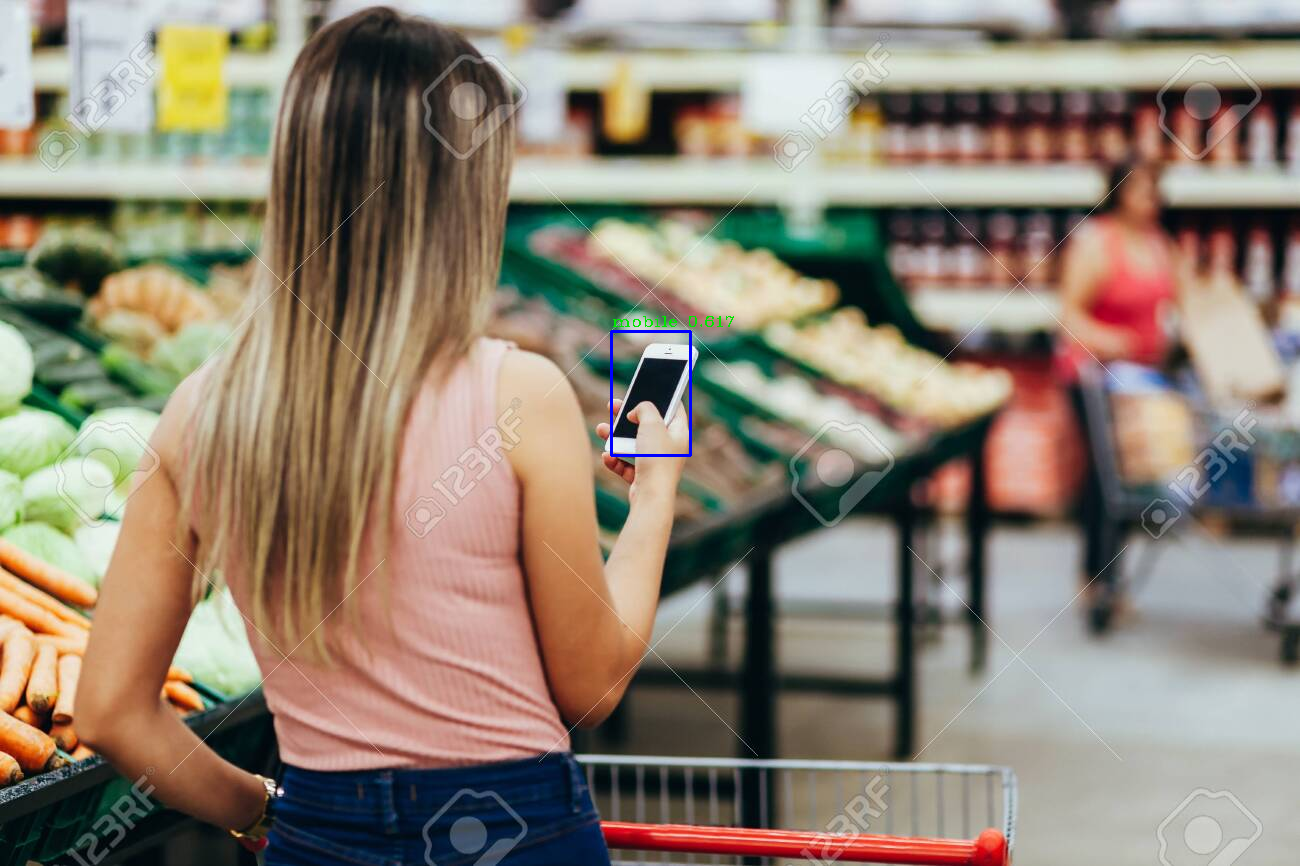

In [0]:
res_img=draw_bbox(org_img,predictions)
from google.colab.patches import cv2_imshow
cv2_imshow(res_img)
#cv2.waitKey(0)

# Future scope:

*   We can use other networks like SSD, Mask RCNN, Faster RCNN etc and try experimenting with accuracy and performance.
*   We can also extend it for pose detection.


> This tutorial is intended to be a public resource. As such, if you see any glaring inaccuracies or if a critical topic is missing, please feel free to point it out or (preferably) submit a pull request to improve the tutorial. Also, we are always looking to improve the scope of this article. For anything feel free to mail us @ colearninglounge@gmail.com


> Author of this article is Venkata Durga Rao Gambali. You can follow him on [LinkedIn](https://www.linkedin.com/in/venkata-durga-rao-gambali-24606b79/), [GitHub](https://github.com/venkatadj).
